In [1]:
# Standard Data Science Helpers
import numpy as np
import scipy

import pandas as pd
import featuretools as ft

# Graphic libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh');plt.rcParams['font.size']=18
import seaborn as sns

# Extra options 

pd.options.display.max_rows = 10
pd.set_option('max_columns', 100)

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def ecdf_values(x):
    """Generate values for empirical cumulative distribution function
    
    Params
    --------
        x (array or list of numeric values): distribution for ECDF
    
    Returns
    --------
        x (array): x values
        y (array): percentile values
    """
    
    # Sort values and find length
    x = np.sort(x)
    n = len(x)
    # Create percentiles
    y = np.arange(1, n + 1, 1) / n
    return x, y

In [3]:
x = [32444, 12456, 14911,23064,27055,29427,47710,
     42322,51206,75041,67713]

xs, ys = ecdf_values(x)
ys

array([0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545,
       0.54545455, 0.63636364, 0.72727273, 0.81818182, 0.90909091,
       1.        ])

In [4]:
def ecdf_plot(x, name = 'Value', plot_normal = True, log_scale=False):
    """ECDF plot of x
    Params
    --------
        x (array or list of numerics): distribution for ECDF
        name (str): name of the distribution, used for labeling
        plot_normal (bool): plot the normal distribution (from mean and std of data)
        log_scale (bool): transform the scale to logarithmic
    
    Returns
    --------
        none, displays plot
    
    """
    xs, ys = ecdf_values(x)
    fig = plt.figure(figsize = (10, 6))
    ax = plt.subplot(1, 1, 1)
    plt.step(xs, ys, linewidth = 2.5, c= 'b');
    
    plot_range = ax.get_xlim()[1] - ax.get_xlim()[0]
    fig_sizex = fig.get_size_inches()[0]
    data_inch = plot_range / fig_sizex
    right = 0.6 * data_inch + max(xs)
    gap = right - max(xs)
    left = min(xs) - gap
    
    if log_scale:
        ax.set_xscale('log')
        
    if plot_normal:
        gxs, gys = ecdf_values(np.random.normal(loc = xs.mean(), scale = xs.std(), size = 100000))
        plt.plot(gxs, gys, 'g');

    plt.vlines(x=min(xs), ymin=0, ymax=min(ys), color = 'b', linewidth = 2.5)
    plt.xticks(size = 16); plt.yticks(size = 16)
    plt.xlabel(f'{name}', size = 18); plt.ylabel('Percentile', size = 18);

    plt.vlines(x=min(xs), ymin = min(ys), ymax=0.065, color = 'r', 
               linestyle = '-', alpha = 0.8, linewidth = 1.7)
    plt.vlines(x=max(xs), ymin=0.935, ymax=max(ys), color = 'r', 
               linestyle = '-', alpha = 0.8, linewidth = 1.7)

    plt.annotate(s = f'{min(xs):.2f}', xy = (min(xs), 0.065),
                horizontalalignment = 'center',
                verticalalignment = 'bottom',
                size = 15)
    plt.annotate(s = f'{max(xs):.2f}', xy = (max(xs), 0.935),
                horizontalalignment = 'center',
                verticalalignment = 'top',
                size = 15)
    
    ps = [0.25, 0.5, 0.75]

    for p in ps:

        ax.set_xlim(left = left, right = right)
        ax.set_ylim(bottom = 0)

        value = xs[np.where(ys > p)[0][0] - 1]
        pvalue = ys[np.where(ys > p)[0][0] - 1]

        plt.hlines(y=p, xmin=left, xmax = value,
                    linestyles = ':', colors = 'r', linewidth = 1.4);

        plt.vlines(x=value, ymin=0, ymax = pvalue, 
                   linestyles = ':', colors = 'r', linewidth = 1.4)
        
        plt.text(x = p / 3, y = p - 0.01, 
                 transform = ax.transAxes,
                 s = f'{int(100*p)}%', size = 15,
                 color = 'r', alpha = 0.7)

        plt.text(x = value, y = 0.01, size = 15,
                 horizontalalignment = 'left',
                 s = f'{value:.2f}', color = 'r', alpha = 0.8);

    plt.title(f'ECDF of {name}', size = 20);

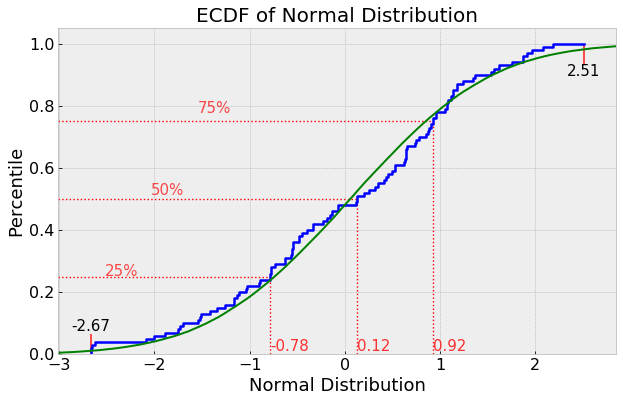

In [5]:
ecdf_plot(np.random.randn(100), name='Normal Distribution')

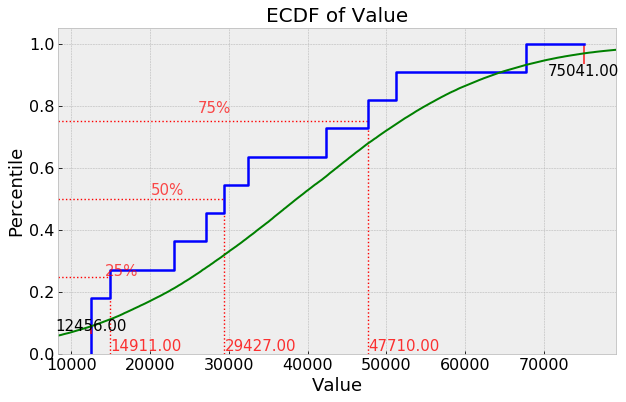

In [6]:
ecdf_plot(x)